<a href="https://colab.research.google.com/github/Mario-RJunior/departamento-manutencao/blob/main/departamento_manutencao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Departamento de Produção

## Importação das bibliotecas e da base de dados

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import Dense, Input, AveragePooling2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, UpSampling2D, Concatenate
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

In [2]:
# Montando o drive do Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataframe com todas as imagens
all_images_df = pd.read_csv('/content/drive/MyDrive/Departamento de manutenção/defect_and_no_defect.csv')

In [4]:
# Shape
all_images_df.shape

(12997, 2)

In [5]:
# Visualizando o dataframe
all_images_df

,ImageID,label
0,0002cc93b.jpg,1
1,0007a71bf.jpg,1
2,000a4bcdd.jpg,1
3,000f6bf48.jpg,1
4,0014fce06.jpg,1
...,...,...
12992,0482ee1d6.jpg,0
12993,04802a6c2.jpg,0
12994,03ae2bc91.jpg,0
12995,04238d7e3.jpg,0


Nota:

- Label 0: sem defeito.
- Label 1: com defeito.

In [11]:
# Dataframe com imagens com defeitos
defect_class_mask_df = pd.read_csv('/content/drive/MyDrive/Departamento de manutenção/train.csv')

In [7]:
# Shape
defect_class_mask_df.shape

(5748, 3)

In [8]:
# Porcentagem da quantidade de imagens com defeito
percent = (defect_class_mask_df.shape[0]/all_images_df.shape[0]) * 100
print('Percentual de imagens defeituosas: {}%'.format(percent))

Percentual de imagens defeituosas: 44.22559052088943%


In [9]:
# Visualizando o dataframe
defect_class_mask_df

,ImageId,ClassId,EncodedPixels
0,d2291de5c.jpg,1,147963 3 148213 9 148461 18 148711 24 148965 2...
1,78416c3d0.jpg,3,54365 3 54621 7 54877 10 55133 12 55388 14 556...
2,2283f2183.jpg,3,201217 43 201473 128 201729 213 201985 5086 20...
3,f0dc068a8.jpg,3,159207 26 159412 77 159617 128 159822 179 1600...
4,00d639396.jpg,3,229356 17 229595 34 229850 36 230105 37 230360...
...,...,...,...
5743,c12842f5e.jpg,3,88 23 342 29 596 34 850 39 1105 44 1361 46 161...
5744,2222a03b3.jpg,3,63332 4 63587 11 63841 20 64096 27 64351 35 64...
5745,b43ea2c01.jpg,1,185024 7 185279 11 185535 12 185790 13 186045 ...
5746,1bc37a6f4.jpg,3,303867 1 304122 3 304376 6 304613 3 304630 9 3...


In [10]:
# Valores únicos dos defeitos
defect_class_mask_df['ClassId'].unique()

array([1, 3, 4, 2])

## Exploração e visualização dos dados

In [13]:
# Quantidade de imagens com defeitos e sem defeitos
all_images_df['label'].value_counts()

1    7095
0    5902
Name: label, dtype: int64

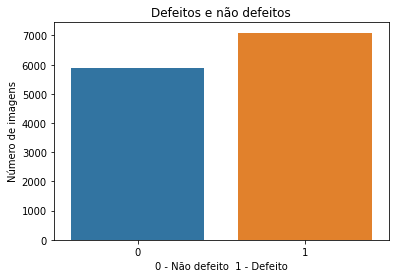

In [15]:
# Contagem gráficamente
# plt.figure(figsize=(10,10))
sns.countplot(data=all_images_df, x='label')
plt.ylabel('Número de imagens')
plt.xlabel('0 - Não defeito  1 - Defeito')
plt.title('Defeitos e não defeitos');